In [1]:
# from spotify import *
# import json

# all_artists = kpop_artists + general_artists

# top_tracks_from_artist = {}
# for artist in all_artists:
#     print(artist)
#     top_tracks = artist_top_tracks(artist)
#     top_tracks_from_artist[artist] = top_tracks
    
# tracks_features = {}

# for artist, tracks in top_tracks_from_artist.items():
#     tracks_features[artist] = {}
#     for track, track_features in zip(tracks, sp.audio_features(tracks)):
#         tracks_features[artist][track] = {}
#         for feature in features_of_interest:
#             tracks_features[artist][track][feature] = track_features[feature]
            
# with open('track-features.json', 'w') as f:
#     json.dump(tracks_features, f)

In [76]:
import json
import numpy as np
from sklearn.model_selection import train_test_split

json_file = open("track-features.json", "r")
track_features = json.load(json_file)

x_data = []
y_data = []

for artist_id, artist_tracks in track_features.items():
    for track_id, track in artist_tracks.items():
        x_data.append([f_value for f_name, f_value in track.items()])
        y_data.append(1 if artist_id == "3Nrfpe0tUJi4K4DXYWgMUX" else 0)
        
all_x_data = np.array(x_data)
all_y_data = np.array(y_data)

bts_x_data = all_x_data[all_y_data == 1]
bts_y_data = all_y_data[all_y_data == 1]
others_x_data = all_x_data[all_y_data == 0]
others_y_data = all_y_data[all_y_data == 0]

train_bts_x, val_bts_x, train_bts_y, val_bts_y = train_test_split(bts_x_data, bts_y_data, test_size=0.2, random_state=0)
train_others_x, val_others_x, train_others_y, val_others_y = train_test_split(others_x_data, others_y_data, test_size=0.2, random_state=0)

X = np.concatenate((bts_x_data, others_x_data))
y = np.concatenate((bts_y_data, others_y_data))

[13:26:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


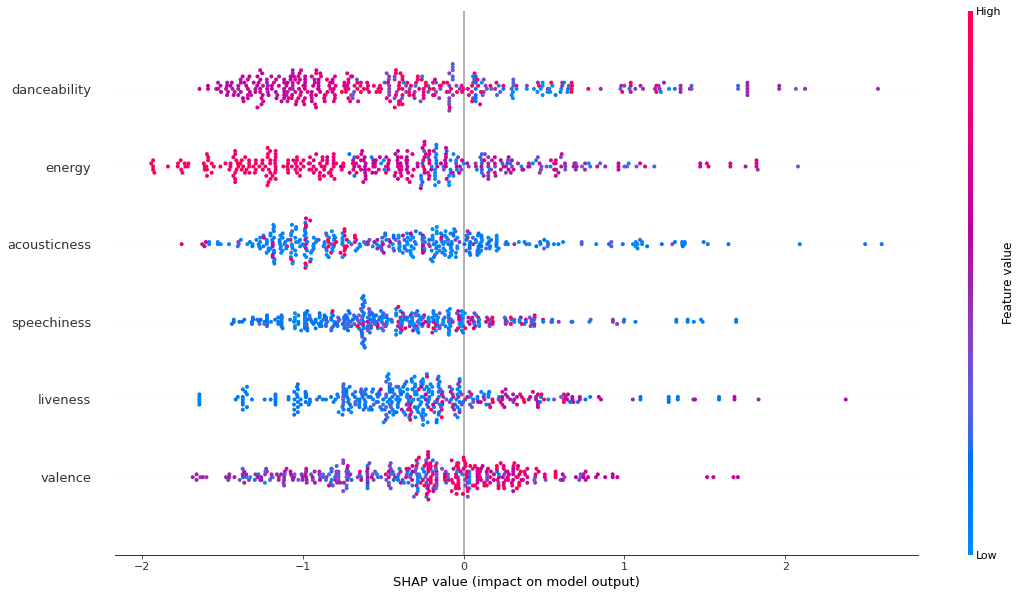

In [99]:
import xgboost
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import shap
import matplotlib.pyplot as plt
import pandas as pd

X_df = pd.DataFrame(X, columns=["acousticness", "danceability", "energy", "liveness", "speechiness", "valence"])

model = xgboost.XGBClassifier()
model.fit(X_df, y)

explainer = shap.TreeExplainer(model)
shap_values = explainer(X_df)

shap.plots.beeswarm(shap_values, plot_size=(18, 10), show=False)

In [96]:
import seaborn as sns

vs = []
for shap_v in shap_values:
    vs.append(shap_v.values[0])
    
ax = sns.swarmplot(x="day", y="total_bill", data=vs)
plt.show()

AttributeError: 'list' object has no attribute 'get'